In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [20]:
sns.set_style('whitegrid')
sns.set_palette('flare')
test_cols = ['3P', '2P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
             '3PAr', 'FTr', 'TRB%', 'STL%', 'BLK%',
             'USG%', 'OWS', 'DWS', 'VORP', 'Year_x']
df = pd.read_csv('Full Dataset.csv', index_col=0)
df_copy = df.copy()
df.drop(columns=['All_Star'], inplace=True)
df.shape


(18264, 55)

In [21]:
df['Got_MVP_Votes'] = pd.Categorical(np.where(df['MVP_Share'] != 0, 1, 0))
df.Got_MVP_Votes = df.Got_MVP_Votes.astype(np.int64)

X = df.drop(columns=['Player', 'Tm', 'GS', 'MVP_Pts Won', 'MVP_Share', 'MVP_Pts Max', 'MVP_Rank', 'MVP_First',
                     'Got_MVP_Votes'])

X = X[test_cols]

y = df[['MVP_Share', 'Got_MVP_Votes', 'Year_x']]

In [56]:
plist= []
rlist= []
f1list = []

for year in range(1980,2023):


    X_train = X[X['Year_x'] != year].copy()
    X_test = X[X['Year_x'] == year].copy()
    y_train = y[y['Year_x'] != year].copy()
    y_test = y[y['Year_x'] == year].copy()
    for i in [X_train, X_test, y_train, y_test]:
        i.drop(columns=['Year_x'], inplace=True)

    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train['Got_MVP_Votes'])

    precision = metrics.precision_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test))
    recall = metrics.recall_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test))
    f1score = metrics.f1_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test))
    plist.append(precision)
    rlist.append(recall)
    f1list.append(f1score)
    print(f'Precision {year}: {precision}',)
    print(f'Recall {year}: {recall}')


    X_test['got_votes_pred'] = rf_clf.predict(X_test)
    X_test_reg = X_test.loc[X_test.got_votes_pred == 1, X_test.drop(columns=['got_votes_pred']).columns]

    pred_vote_getters =  df.loc[(X_test_reg.index),'Player'].tolist()

    actual_vote_getters = df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x == year),'Player'].tolist()

    tp = [i for i in pred_vote_getters if i in actual_vote_getters]
    fn = [i for i in actual_vote_getters if i not in pred_vote_getters]
    fp = [i for i in pred_vote_getters if i not in actual_vote_getters]
    # tn = [i for i in pred_vote_getters if i in actual_vote_getters]


    # for i in fp:
        # print(f'{i}, ',end='')






Precision 1980: 0.5
Recall 1980: 0.6666666666666666
Precision 1981: 1.0
Recall 1981: 0.25925925925925924
Precision 1982: 1.0
Recall 1982: 0.4782608695652174
Precision 1983: 1.0
Recall 1983: 0.5
Precision 1984: 0.7692307692307693
Recall 1984: 0.6666666666666666
Precision 1985: 0.9166666666666666
Recall 1985: 0.5238095238095238
Precision 1986: 0.8888888888888888
Recall 1986: 0.5
Precision 1987: 0.8
Recall 1987: 0.8
Precision 1988: 0.9090909090909091
Recall 1988: 0.5882352941176471
Precision 1989: 0.75
Recall 1989: 0.5294117647058824
Precision 1990: 0.6470588235294118
Recall 1990: 0.7857142857142857
Precision 1991: 0.8125
Recall 1991: 0.65
Precision 1992: 0.9090909090909091
Recall 1992: 0.5882352941176471
Precision 1993: 0.9090909090909091
Recall 1993: 0.7142857142857143
Precision 1994: 1.0
Recall 1994: 0.5294117647058824
Precision 1995: 0.8333333333333334
Recall 1995: 0.6666666666666666
Precision 1996: 0.9285714285714286
Recall 1996: 0.7647058823529411
Precision 1997: 0.8571428571428571


In [57]:
np.mean(f1list)

0.7046430050807206

In [14]:
X_test['got_votes_pred'] = rf_clf.predict(X_test)

X_test_reg = X_test.loc[X_test.got_votes_pred == 1, X_test.drop(columns=['got_votes_pred']).columns]


0.6418691502109095

In [48]:


year = 2022

X_train = X[X['Year_x'] != year].copy()
X_test = X[X['Year_x'] == year].copy()
y_train = y[y['Year_x'] != year].copy()
y_test = y[y['Year_x'] == year].copy()
for i in [X_train, X_test, y_train, y_test]:
    i.drop(columns=['Year_x'], inplace=True)


In [49]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train['MVP_Share'])

RandomForestRegressor()

In [50]:
pred = rf.predict(X_test)

In [51]:
print(f'RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test["MVP_Share"],pred)),3)}')
print(f'MAE: {round(metrics.mean_absolute_error(y_test["MVP_Share"],pred),5)}')
print(f'R2: {round(np.sqrt(metrics.r2_score(y_test["MVP_Share"],pred)),3)}')

RMSE: 0.016
MAE: 0.00214
R2: 0.955


In [52]:
df.loc[X_test.index,'Pred_MVP_Share'] = pred



df.loc[X_test.index,:].sort_values('Pred_MVP_Share',ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,Got_MVP_Votes,Pred_MVP_Share
17948,Nikola Jokić,5,26,DEN,74,74,33.5,10.3,17.7,0.583,...,13.7,9.8,2022,0.0,65.0,875.0,1000.0,0.875,1,0.80690
17670,Giannis Antetokounmpo,4,27,MIL,67,67,32.9,10.3,18.6,0.553,...,11.2,7.4,2022,2.0,9.0,595.0,1000.0,0.595,1,0.65720
17820,Joel Embiid,5,27,PHI,68,68,33.8,9.8,19.6,0.499,...,9.2,6.5,2022,1.0,26.0,706.0,1000.0,0.706,1,0.52880
17799,Luka Dončić,1,22,DAL,65,65,35.4,9.9,21.6,0.457,...,8.2,5.9,2022,4.0,0.0,146.0,1000.0,0.146,1,0.27883
17932,LeBron James,4,37,LAL,56,56,37.2,11.4,21.8,0.524,...,7.7,5.1,2022,9.0,0.0,1.0,1000.0,0.001,1,0.18416
18184,Jayson Tatum,3,23,BOS,76,76,35.9,9.3,20.6,0.453,...,4.9,4.8,2022,5.0,0.0,43.0,1000.0,0.043,1,0.09783
17812,Kevin Durant,4,33,BRK,55,55,37.2,10.5,20.3,0.518,...,7.2,4.8,2022,9.0,0.0,1.0,1000.0,0.001,1,0.09714
18260,Trae Young,1,23,ATL,76,76,34.9,9.4,20.3,0.460,...,5.2,4.8,2022,0.0,0.0,0.0,0.0,0.000,0,0.08321
17785,Anthony Davis,5,28,LAL,40,40,35.1,9.3,17.4,0.532,...,3.8,2.0,2022,0.0,0.0,0.0,0.0,0.000,0,0.04566
17717,Devin Booker,2,25,PHO,68,68,34.5,9.7,20.9,0.466,...,4.1,3.6,2022,3.0,0.0,216.0,1000.0,0.216,1,0.04047


In [53]:
X_test['Pred_MVP_Share'] = pred

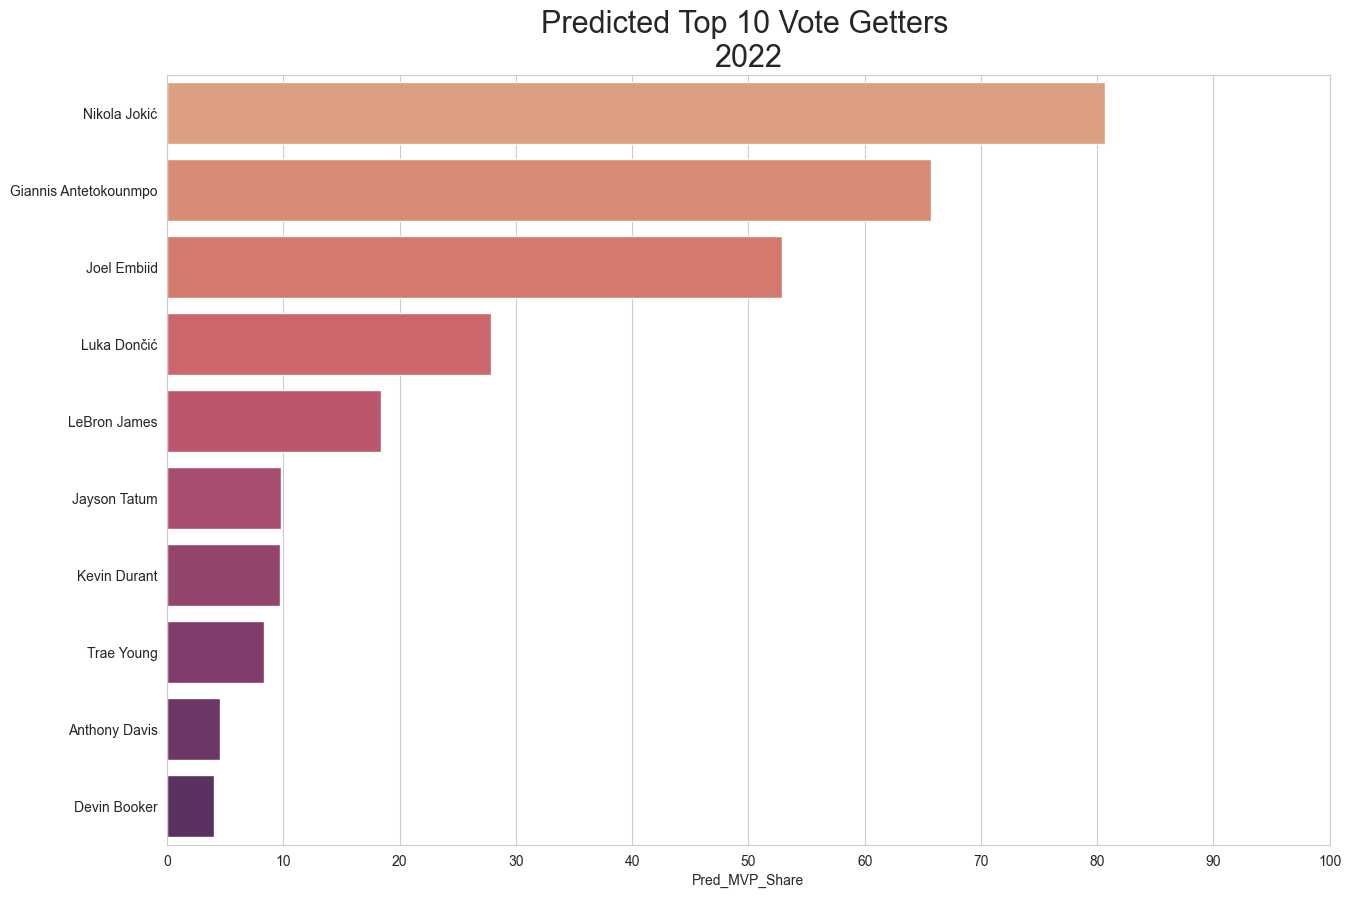

In [55]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))
# X_test['Pred_MVP_Share'] =X_test['Pred_MVP_Share'] *100

sns.barplot(x='Pred_MVP_Share', y='Player',
            data=X_test.sort_values('Pred_MVP_Share', ascending=False)[:10],palette=sns.color_palette('flare',10))
plt.xticks([i for i in range(0, 110, 10)])
plt.ylabel('')
plt.title(f'Predicted Top 10 Vote Getters \n{year}',fontdict={'size':22,})

# plt.savefig(f'Predicted Top 10 Vote Getters {year}.png',dpi=400)

plt.show()

In [54]:
X_test['Player'] = df.loc[X_test.index,'Player']